In [1]:
from PIL import Image
import matplotlib.pylab as plt
import random

In [34]:
maze = Image.open('C:/Users/User/Desktop/colab-pyautogui/maze.png')
temp_maze = Image.open('C:/Users/User/Desktop/colab-pyautogui/maze.png')
temp_maze.size

(229, 197)

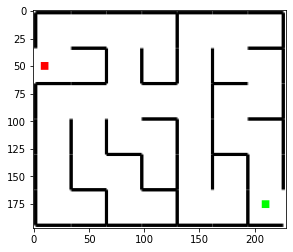

In [37]:
plt.imshow(maze)
#plt.axis("off")
plt.show()

In [36]:
start = (10, 50)
end = (210, 175)
#maze.putpixel(start,(0,0,0))
#maze.putpixel(end,(0,0,0))
for i in range(start[0]-3, start[0]+4):
    for j in range(start[1]-3, start[1]+4):
        maze.putpixel((i,j),(255,0,0))
for i in range(end[0]-3, end[0]+4):
    for j in range(end[1]-3, end[1]+4):
        maze.putpixel((i,j),(0,255,0))

In [38]:
move = [(-1,0), (1,0), (0,-1), (0,1)] #좌, 우, 하, 상
r_seed = random.randrange(0,4)
r_move = move[r_seed]
move_once = 5

In [39]:
now_dot = start
new_dot = (now_dot[0]+r_move[0]*move_once, now_dot[1]+r_move[1]*move_once )

In [40]:
print(now_dot, new_dot)

(10, 50) (15, 50)


In [41]:
for i in range(new_dot[0]-5, new_dot[0]+6):
    for j in range(new_dot[1]-5, new_dot[1]+6):
        print(temp_maze.getpixel((i,j))) #🎈temp_maze 새로운 미로에서 getpixel (255, 255, 255) 모두흰색~

(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 255, 255)
(255, 25

In [45]:
now_dot[0]

120

In [46]:
move = [(-1,0), (1,0), (0,-1), (0,1)] #좌, 우, 하, 상
now_dot = start
dot_history = [start]
move_once = 5
while True :
    if abs(end[0]-now_dot[0]) <= 5 and abs(end[1]-now_dot[1]) <= 5:
        break
    while True :
        r_seed = random.randrange(0,4)
        r_move = move[r_seed]
        new_dot = (now_dot[0]+r_move[0]*move_once, now_dot[1]+r_move[1]*move_once )
        find_wall = 0
        if (new_dot[0]-5 >= 0) and (new_dot[0]+6 <= maze.size[0]) and (new_dot[1]-5 >= 0) and (new_dot[1]+6 <= maze.size[1]):
            for i in range(new_dot[0]-5, new_dot[0]+6):
                for j in range(new_dot[1]-5, new_dot[1]+6):
                    color = temp_maze.getpixel((i,j))
                    if color == (0,0,0): #color가 검은색(벽)이라면
                        find_wall = 1
            if find_wall == 0: #빠져나올 조건은 단 하나. 흰공간
                now_dot = new_dot
                dot_history.append(now_dot) #지나간 길 저장
                break


In [47]:
dot_history[-1]

(210, 170)

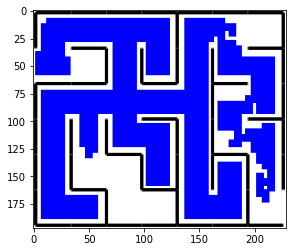

In [48]:
for k in dot_history:
    for ii in range(k[0]-3, k[0]+4):
        for jj in range(k[1]-3, k[1]+4):
            temp_maze.putpixel((ii,jj),(0,0,255))
plt.imshow(temp_maze)
#plt.axis("off")
plt.show()

In [49]:
len(dot_history)

20357

In [50]:
#🚗최적의 길 찾는 알고리즘. 처음과 끝의 10%정도를 끊고. 짧은 길만 업데이트.
cut_length = round(len(dot_history)/10) #수술 길이
start_cut = random.randrange(0, len(dot_history)-cut_length) #수술 시작
end_cut = start_cut+cut_length

In [53]:
temp_start = dot_history[start_cut]
temp_end = dot_history[end_cut]

temp_now_dot = temp_start
temp_dot_history = [temp_start]
#move_once = 5
while True :
    if (temp_end[0]==temp_now_dot[0]) and (temp_end[1]==temp_now_dot[1]): #5로 나누어 떨어질꺼니까.
        break
    while True :
        r_seed = random.randrange(0,4)
        r_move = move[r_seed]
        temp_new_dot = (temp_now_dot[0]+r_move[0]*move_once, temp_now_dot[1]+r_move[1]*move_once )
        find_wall = 0
        if (temp_new_dot[0]-5 >= 0) and (temp_new_dot[0]+6 <= temp_maze.size[0]) and (temp_new_dot[1]-5 >= 0) and (temp_new_dot[1]+6 <= temp_maze.size[1]):
            for i in range(temp_new_dot[0]-5, temp_new_dot[0]+6):
                for j in range(temp_new_dot[1]-5, temp_new_dot[1]+6):
                    color = temp_maze.getpixel((i,j))
                    if color == (0,0,0): #color가 검은색(벽)이라면
                        find_wall = 1
            if find_wall == 0: #빠져나올 조건은 단 하나☝ 흰공간
                temp_now_dot = temp_new_dot
                temp_dot_history.append(temp_now_dot) #지나간 길 저장
                break

In [54]:
print(temp_dot_history[0], temp_start, temp_dot_history[-1], temp_end)
#😭temp_dot_history[-1], temp_end 값이 같아야하는데?? 왜다르지?

(15, 155) (15, 155) (15, 115) (15, 115)


In [55]:
print(len(temp_dot_history), cut_length)

497 2036


In [57]:
temp_start = dot_history[start_cut]
temp_end = dot_history[end_cut]

temp_now_dot = temp_start
temp_dot_history = [temp_start]
while True :
    while True :
        if (temp_end[0]==temp_now_dot[0]) and (temp_end[1]==temp_now_dot[1]): #5로 나누어 떨어질꺼니까.
            break
        while True :
            r_seed = random.randrange(0,4)
            r_move = move[r_seed]
            temp_new_dot = (temp_now_dot[0]+r_move[0]*move_once, temp_now_dot[1]+r_move[1]*move_once )
            find_wall = 0
            if (temp_new_dot[0]-5 >= 0) and (temp_new_dot[0]+6 <= temp_maze.size[0]) and (temp_new_dot[1]-5 >= 0) and (temp_new_dot[1]+6 <= temp_maze.size[1]):
                for i in range(temp_new_dot[0]-5, temp_new_dot[0]+6):
                    for j in range(temp_new_dot[1]-5, temp_new_dot[1]+6):
                        color = temp_maze.getpixel((i,j))
                        if color == (0,0,0): #color가 검은색(벽)이라면
                            find_wall = 1
                if find_wall == 0: #빠져나올 조건은 단 하나☝ 흰공간
                    temp_now_dot = temp_new_dot
                    temp_dot_history.append(temp_now_dot) #지나간 길 저장
                    break
    if len(temp_dot_history) < cut_length:
        break
print(len(temp_dot_history))

593


In [58]:
print(len(temp_dot_history), cut_length)

593 2036


In [59]:
print(dot_history[start_cut])
print(temp_dot_history[0])
# 오예쓰! 같다! 근데 왜  x가 -60이누ㅜㅜ?

(15, 155)
(15, 155)


In [60]:
print(dot_history[end_cut])
print(temp_dot_history[-1])

(15, 115)
(15, 115)


In [61]:
dot_history = dot_history[:start_cut]+ temp_dot_history + dot_history[end_cut+1:]
len(dot_history)

18913

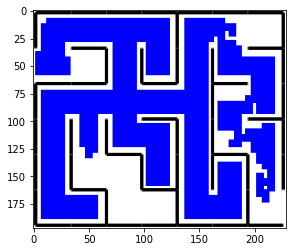

In [62]:
#얼마나 짧아졌는지 보자... 10%밖에 안짧아져서 육안으로 구분 힘듦...ㅋ
temp_maze = Image.open('C:/Users/User/Desktop/colab-pyautogui/maze.png')
for k in dot_history:
    for ii in range(k[0]-3, k[0]+4):
        for jj in range(k[1]-3, k[1]+4):
            temp_maze.putpixel((ii,jj),(0,0,255))
plt.imshow(temp_maze)
#plt.axis("off")
plt.show()

1번째 여정: 18463 


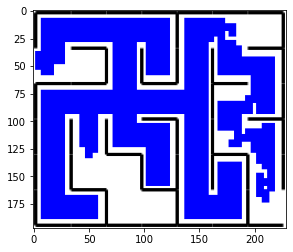

2번째 여정: 17797 


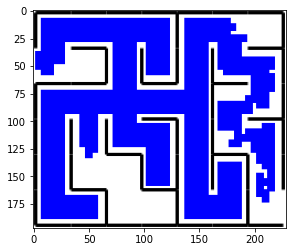

3번째 여정: 16025 


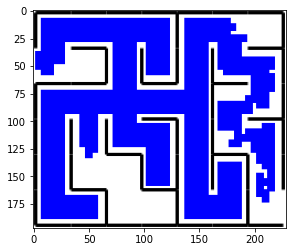

4번째 여정: 15327 


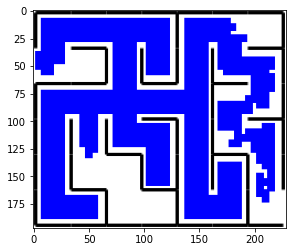

5번째 여정: 13863 


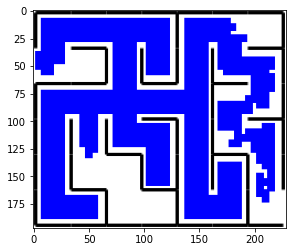

6번째 여정: 13459 


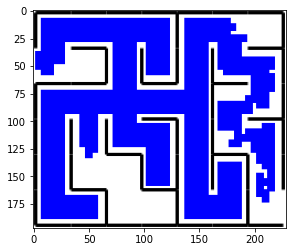

7번째 여정: 13235 


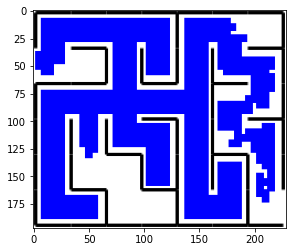

8번째 여정: 12209 


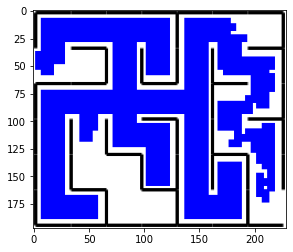

9번째 여정: 12023 


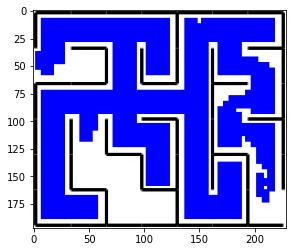

10번째 여정: 11517 


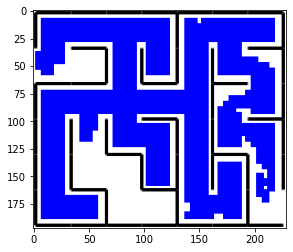

11번째 여정: 10855 


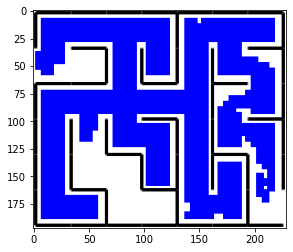

12번째 여정: 9915 


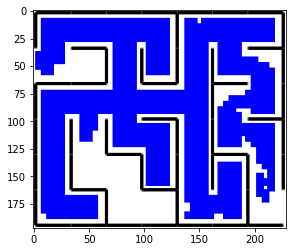

13번째 여정: 9199 


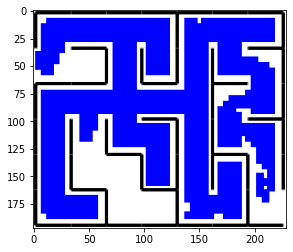

14번째 여정: 8301 


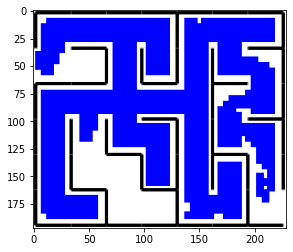

15번째 여정: 7493 


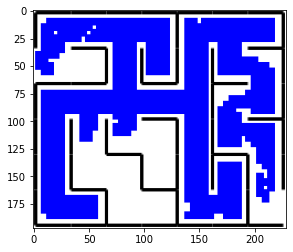

16번째 여정: 6799 


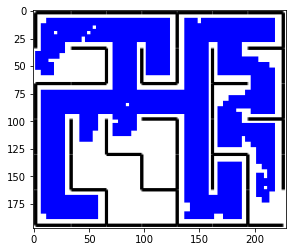

17번째 여정: 6719 


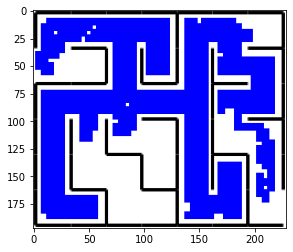

18번째 여정: 6221 


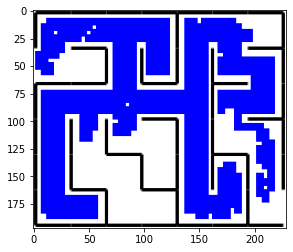

19번째 여정: 5709 


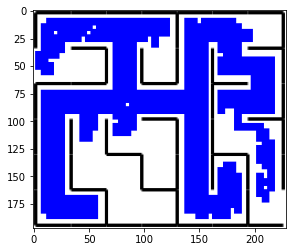

20번째 여정: 5681 


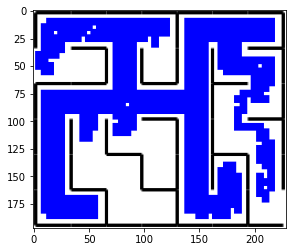

21번째 여정: 5327 


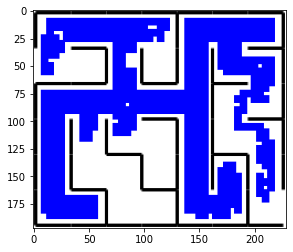

22번째 여정: 4921 


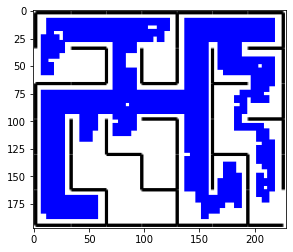

23번째 여정: 4765 


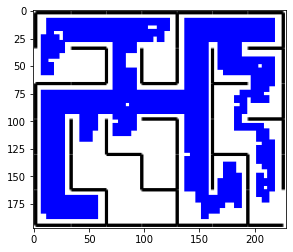

24번째 여정: 4343 


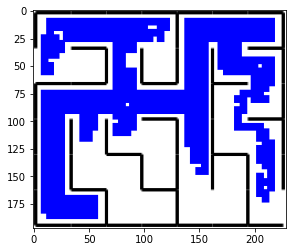

25번째 여정: 3945 


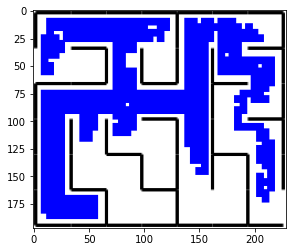

26번째 여정: 3819 


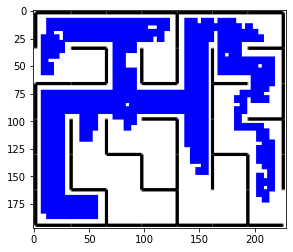

27번째 여정: 3557 


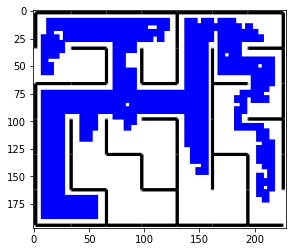

28번째 여정: 3349 


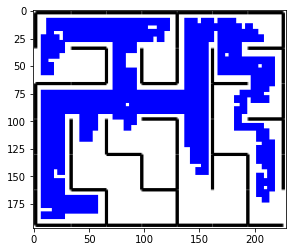

29번째 여정: 3027 


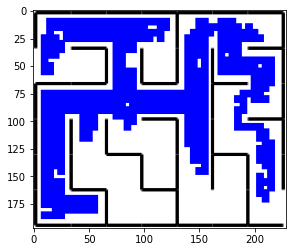

30번째 여정: 2775 


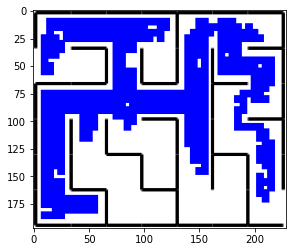

31번째 여정: 2611 


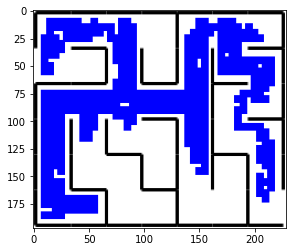

32번째 여정: 2483 


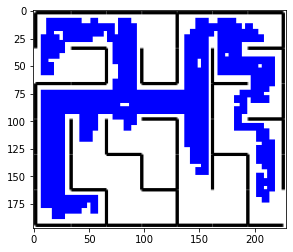

33번째 여정: 2297 


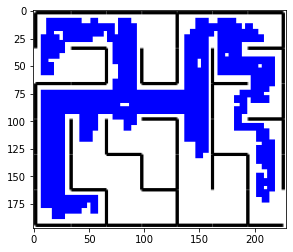

34번째 여정: 2097 


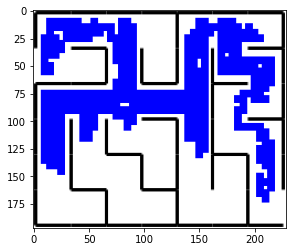

35번째 여정: 1959 


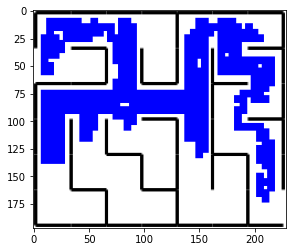

36번째 여정: 1919 


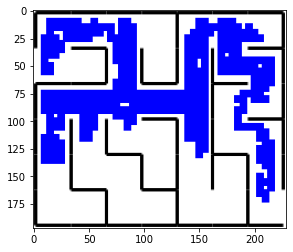

37번째 여정: 1747 


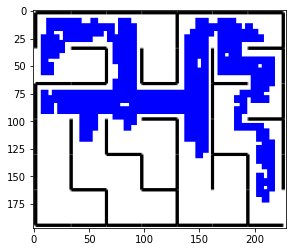

38번째 여정: 1585 


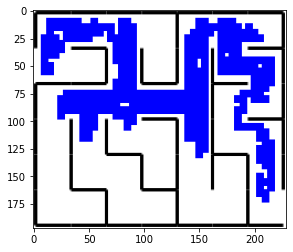

39번째 여정: 1437 


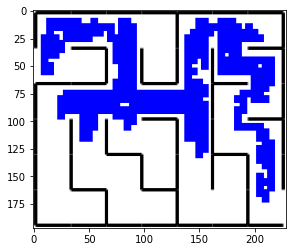

40번째 여정: 1301 


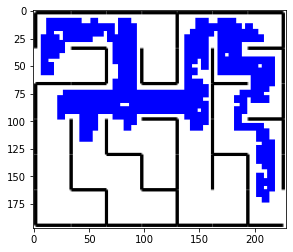

41번째 여정: 1209 


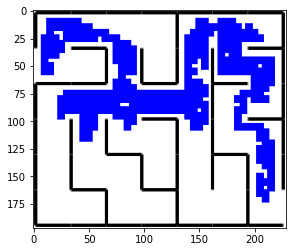

42번째 여정: 1163 


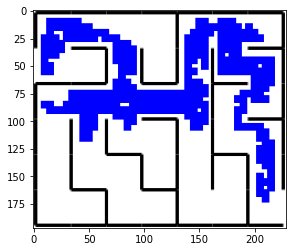

43번째 여정: 1099 


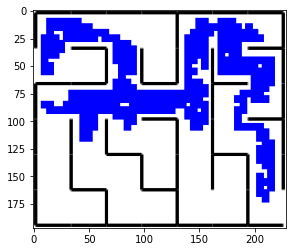

44번째 여정: 1015 


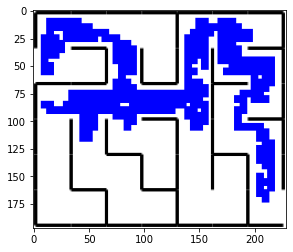

45번째 여정: 939 


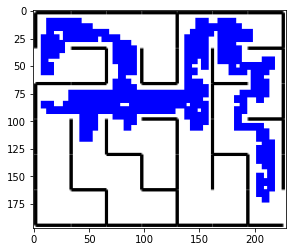

46번째 여정: 853 


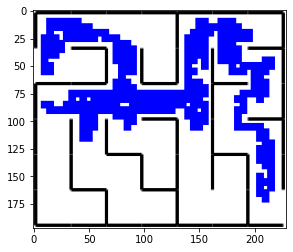

47번째 여정: 775 


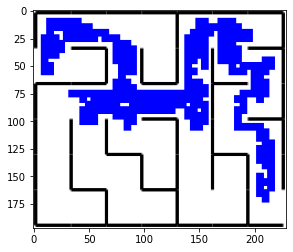

48번째 여정: 733 


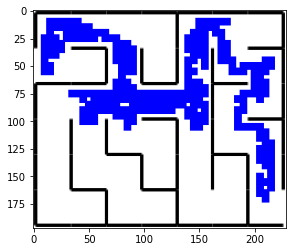

49번째 여정: 663 


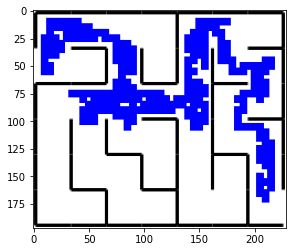

50번째 여정: 615 


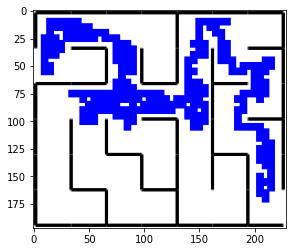

51번째 여정: 605 


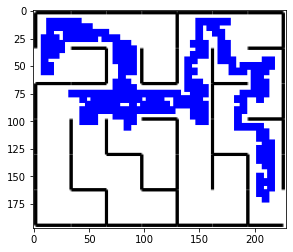

52번째 여정: 553 


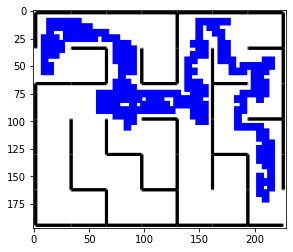

53번째 여정: 547 


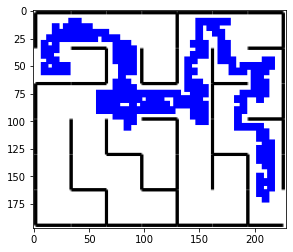

54번째 여정: 515 


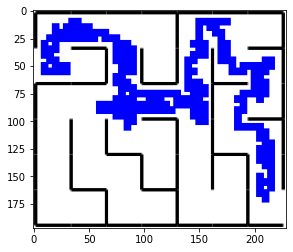

55번째 여정: 509 


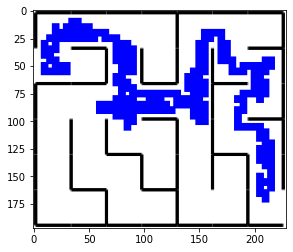

56번째 여정: 461 


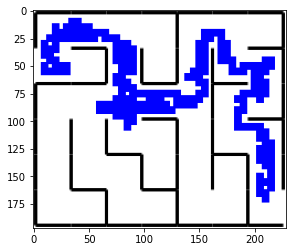

57번째 여정: 415 


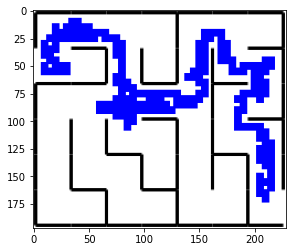

58번째 여정: 373 


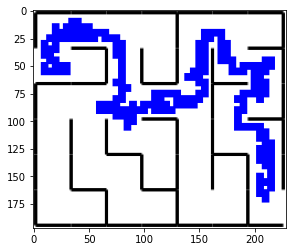

59번째 여정: 341 


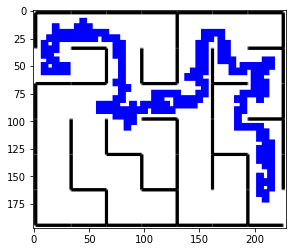

60번째 여정: 337 


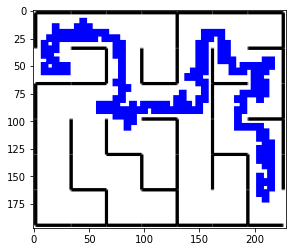

61번째 여정: 315 


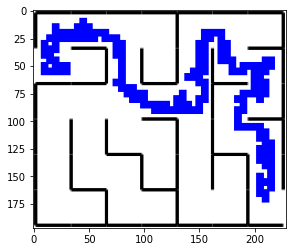

62번째 여정: 299 


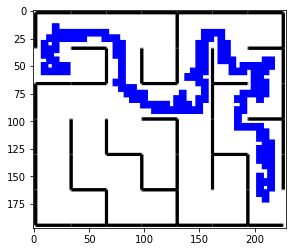

63번째 여정: 289 


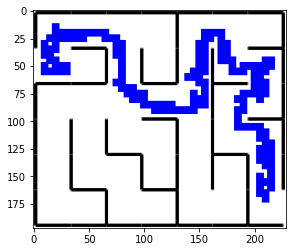

64번째 여정: 279 


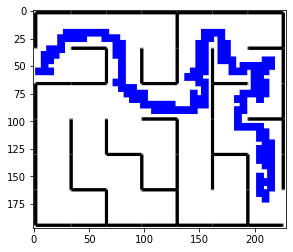

65번째 여정: 267 


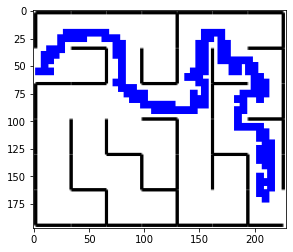

66번째 여정: 263 


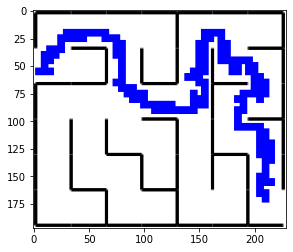

67번째 여정: 253 


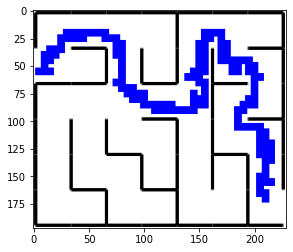

68번째 여정: 237 


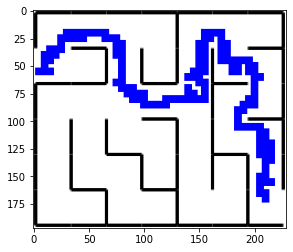

69번째 여정: 235 


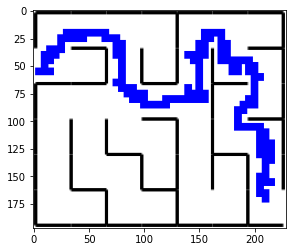

70번째 여정: 227 


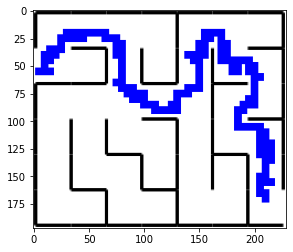

71번째 여정: 215 


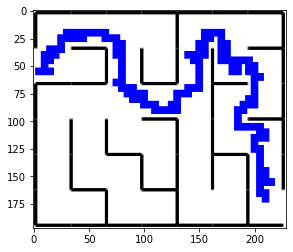

72번째 여정: 203 


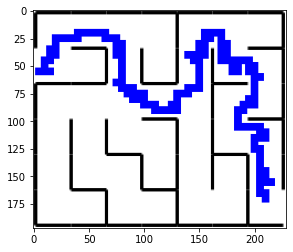

73번째 여정: 201 


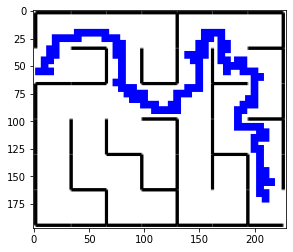

74번째 여정: 197 


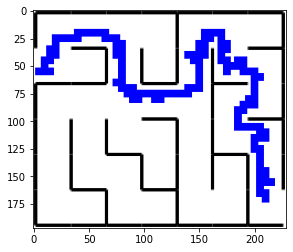

75번째 여정: 187 


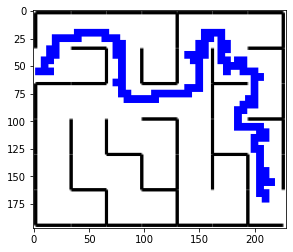

76번째 여정: 185 


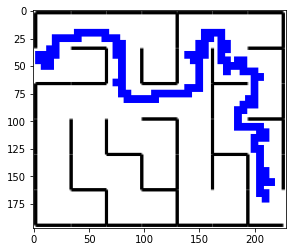

77번째 여정: 181 


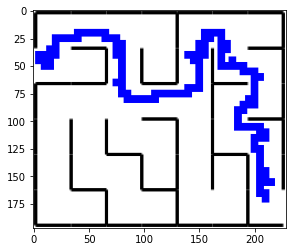

78번째 여정: 177 


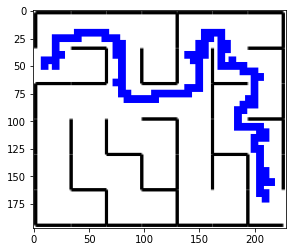

79번째 여정: 171 


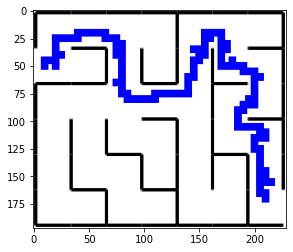

80번째 여정: 161 


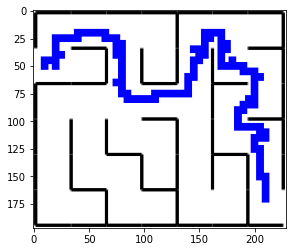

81번째 여정: 159 


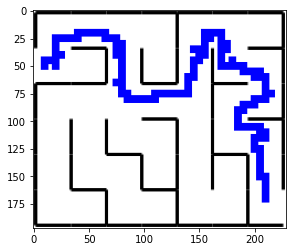

82번째 여정: 157 


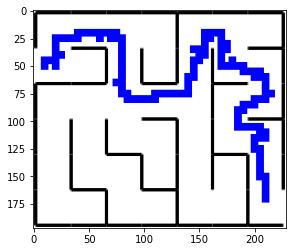

83번째 여정: 153 


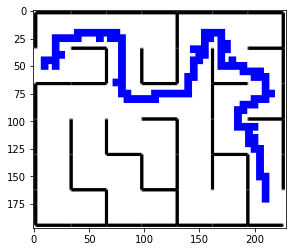

84번째 여정: 151 


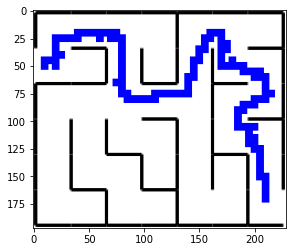

85번째 여정: 147 


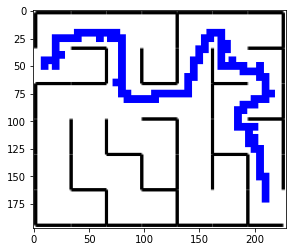

86번째 여정: 143 


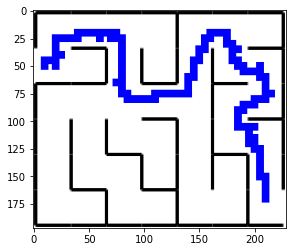

87번째 여정: 139 


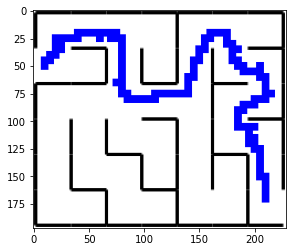

88번째 여정: 135 


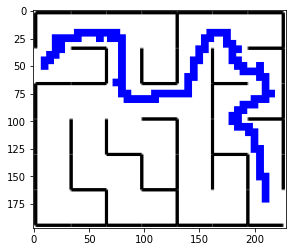

89번째 여정: 131 


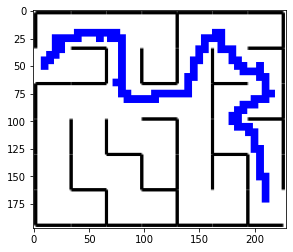

90번째 여정: 127 


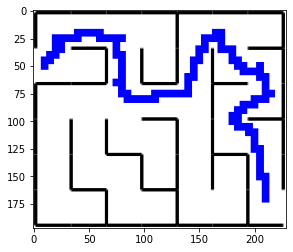

91번째 여정: 125 


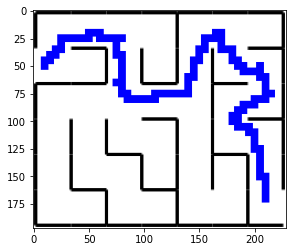

92번째 여정: 123 


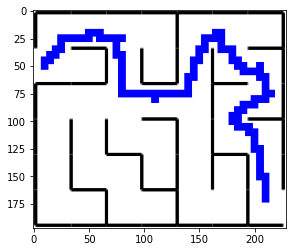

93번째 여정: 119 


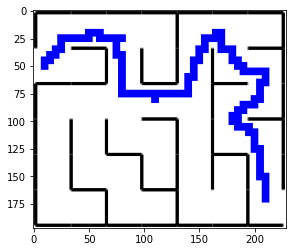

94번째 여정: 115 


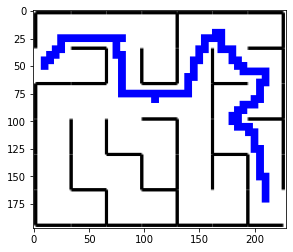

95번째 여정: 113 


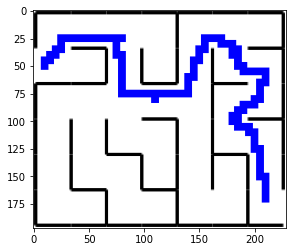

KeyboardInterrupt: 

In [63]:
# 🎊합쳐서 while 돌릴꺼야~ 단순한 미로라 100번정도 돌리면 나오는 듯
trial = 0
while True:
    cut_length = round(len(dot_history)/10) #수술 길이
    
    while True :
        start_cut = random.randrange(0, len(dot_history)-cut_length) #수술 시작
        end_cut = start_cut+cut_length #수술 끝

        temp_start = dot_history[start_cut]
        temp_end = dot_history[end_cut]

        temp_now_dot = temp_start
        temp_dot_history = [temp_start]
        while True:
            if (temp_end[0]==temp_now_dot[0]) and (temp_end[1]==temp_now_dot[1]): #5로 나누어 떨어질꺼니까.
                break
            while True :
                r_seed = random.randrange(0,4)
                r_move = move[r_seed]
                temp_new_dot = (temp_now_dot[0]+r_move[0]*move_once, temp_now_dot[1]+r_move[1]*move_once )
                find_wall = 0
                #image index out of range 에러 보완
                if (temp_new_dot[0]-5 >= 0) and (temp_new_dot[0]+6 <= temp_maze.size[0]) and (temp_new_dot[1]-5 >= 0) and (temp_new_dot[1]+6 <= temp_maze.size[1]):
                    for i in range(temp_new_dot[0]-5, temp_new_dot[0]+6):
                        for j in range(temp_new_dot[1]-5, temp_new_dot[1]+6):
                            color = temp_maze.getpixel((i,j))
                            if color == (0,0,0): #color가 검은색(벽)이라면
                                find_wall = 1
                else : find_wall = 1 #여기추가
                if find_wall == 0: #빠져나올 조건은 단 하나☝ 흰공간
                    temp_now_dot = temp_new_dot
                    temp_dot_history.append(temp_now_dot) #지나간 길 저장
                    break
            if len(temp_dot_history) > cut_length:
                break
        if len(temp_dot_history) < cut_length:
            break
    dot_history = dot_history[:start_cut]+ temp_dot_history + dot_history[end_cut+1:]

    #얼마나 짧아졌는지 보자...
    trial += 1
    temp_maze = Image.open('C:/Users/User/Desktop/colab-pyautogui/maze.png')
    for k in dot_history:
        for ii in range(k[0]-3, k[0]+4):
            for jj in range(k[1]-3, k[1]+4):
                temp_maze.putpixel((ii,jj),(0,0,255))
    print("{}번째 여정: {} ".format(trial,len(dot_history)))
    plt.imshow(temp_maze)
    #plt.axis("off")
    plt.show()
